In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sharan ru
trnava sk
tromso no
rikitea pf
bluff nz
roebourne au
port alfred za
dingle ie
hilo us
xuchang cn
hermanus za
port elizabeth za
laguna br
taolanaro mg
asfi ma
coihaique cl
east london za
mar del plata ar
cherskiy ru
taolanaro mg
chuy uy
ushuaia ar
gat ly
rikitea pf
atuona pf
hermanus za
kapaa us
saskylakh ru
acapulco mx
san ignacio bo
chuy uy
touros br
hobart au
bredasdorp za
lagoa pt
ust-tsilma ru
jamestown sh
half moon bay us
roald no
taburi ph
hasaki jp
hermanus za
hermanus za
belawan id
arraial do cabo br
manacapuru br
atuona pf
puerto ayora ec
sinjah sd
lillooet ca
east london za
ushuaia ar
rikitea pf
millinocket us
kalabo zm
punta arenas cl
new norfolk au
albany au
bambous virieux mu
punta arenas cl
faanui pf
pangnirtung ca
atuona pf
kudahuvadhoo mv
sola vu
belushya guba ru
beloha mg
saint george bm
tirano it
hami cn
bembereke bj
nishihara jp
chuy uy
dwarka in
demba cd
sao joao da barra br
balkhash kz
sechura pe
victoria sc
rikitea pf
souillac mu
sisimiut gl
zyryanka ru


zhezkazgan kz
mataura pf
butaritari ki
castro cl
taolanaro mg
nikolskoye ru
illoqqortoormiut gl
nemuro jp
illoqqortoormiut gl
busselton au
illoqqortoormiut gl
espanola ca
barentsburg sj
kahului us
yellowknife ca
bethel us
chokurdakh ru
hofn is
yar-sale ru
kaitangata nz
pevek ru
terrace ca
avarua ck
formoso do araguaia br
abu samrah qa
hobart au
nemuro jp
tuktoyaktuk ca
kapaa us
port hedland au
geraldton au
cape town za
tilichiki ru
ilulissat gl
makaha us
atuona pf
port elizabeth za
namatanai pg
chaozhou cn
entre rios bo
pevek ru
tuktoyaktuk ca
busselton au
san ciro de acosta mx
taolanaro mg
bluff nz
tsiroanomandidy mg
tiksi ru
barrow us
mataura pf
kisangani cd
pangnirtung ca
sentyabrskiy ru
bethel us
saint anthony ca
narino co
camocim br
clyde river ca
leningradskiy ru
bolungarvik is
dzerzhinsk ru
belushya guba ru
omboue ga
quatre cocos mu
hasaki jp
georgetown sh
lasa cn
puerto ayora ec
sentyabrskiy ru
vaitupu wf
vaitupu wf
elizabeth city us
caravelas br
rikitea pf
kodiak us
heide de
e

dikson ru
columbus us
saleaula ws
batagay ru
yerbogachen ru
pacific grove us
butaritari ki


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
import requests
requests.__version__

'2.24.0'

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import gkey

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb5b1f9c85eea60565815b7edc4c2b87


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sharan
Processing Record 2 of Set 1 | trnava
Processing Record 3 of Set 1 | tromso
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | roebourne
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | dingle
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | xuchang
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | laguna
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | asfi
Processing Record 16 of Set 1 | coihaique
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | gat
Processing Record 23 of Set 1 | 

Processing Record 37 of Set 4 | guimar
Processing Record 38 of Set 4 | hofn
Processing Record 39 of Set 4 | bonavista
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | jalu
Processing Record 43 of Set 4 | kondoa
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | gigmoto
Processing Record 46 of Set 4 | mahajanga
Processing Record 47 of Set 4 | sadri
Processing Record 48 of Set 4 | arkansas city
Processing Record 49 of Set 4 | timizart
Processing Record 50 of Set 4 | amarante do maranhao
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | arvika
Processing Record 3 of Set 5 | neryungri
Processing Record 4 of Set 5 | whakatane
Processing Record 5 of Set 5 | ovre ardal
Processing Record 6 of Set 5 | chimoio
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | xichang
Processing Record 9 of Set 5 | san carlos de bariloche
Process

Processing Record 29 of Set 8 | adre
Processing Record 30 of Set 8 | cabo san lucas
Processing Record 31 of Set 8 | senneterre
Processing Record 32 of Set 8 | fergus falls
Processing Record 33 of Set 8 | quisqueya
Processing Record 34 of Set 8 | miri
Processing Record 35 of Set 8 | haibowan
City not found. Skipping...
Processing Record 36 of Set 8 | kailaras
Processing Record 37 of Set 8 | taltal
Processing Record 38 of Set 8 | ndele
Processing Record 39 of Set 8 | praya
Processing Record 40 of Set 8 | mpulungu
Processing Record 41 of Set 8 | benjamin constant
Processing Record 42 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 43 of Set 8 | ilhabela
Processing Record 44 of Set 8 | sri aman
Processing Record 45 of Set 8 | olafsvik
Processing Record 46 of Set 8 | evans
Processing Record 47 of Set 8 | chipinge
Processing Record 48 of Set 8 | shache
Processing Record 49 of Set 8 | hobyo
Processing Record 50 of Set 8 | ankazoabo
Processing Record 1 of Set 9 | saint anthon

Processing Record 18 of Set 12 | barinitas
Processing Record 19 of Set 12 | porto novo
Processing Record 20 of Set 12 | palaikastron
Processing Record 21 of Set 12 | iquique
Processing Record 22 of Set 12 | punta alta
Processing Record 23 of Set 12 | sorong
Processing Record 24 of Set 12 | beringovskiy
Processing Record 25 of Set 12 | krapivinskiy
Processing Record 26 of Set 12 | challapata
Processing Record 27 of Set 12 | tecolutla
Processing Record 28 of Set 12 | susangerd
Processing Record 29 of Set 12 | russell
Processing Record 30 of Set 12 | yenagoa
Processing Record 31 of Set 12 | claremore
Processing Record 32 of Set 12 | buchanan
Processing Record 33 of Set 12 | ambilobe
Processing Record 34 of Set 12 | sao felix do xingu
Processing Record 35 of Set 12 | lata
Processing Record 36 of Set 12 | acara
Processing Record 37 of Set 12 | andilamena
Processing Record 38 of Set 12 | iaciara
Processing Record 39 of Set 12 | saint-pierre
Processing Record 40 of Set 12 | nago
Processing Re

In [10]:
len(city_data)

599

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sharan,54.8167,54.0000,1.44,100,100,6.06,RU,2022-03-10 22:51:50
1,Trnava,48.3774,17.5872,34.21,50,20,9.66,SK,2022-03-10 22:51:50
2,Tromso,69.6496,18.9570,38.37,81,75,21.85,NO,2022-03-10 22:51:51
3,Rikitea,-23.1203,-134.9692,78.76,69,10,6.78,PF,2022-03-10 22:47:34
4,Bluff,-46.6000,168.3333,62.80,66,100,12.15,NZ,2022-03-10 22:45:15
5,Roebourne,-20.7833,117.1333,86.81,56,3,3.80,AU,2022-03-10 22:51:51
6,Port Alfred,-33.5906,26.8910,70.86,83,37,3.36,ZA,2022-03-10 22:48:57
7,Dingle,10.9995,122.6711,77.50,89,70,6.38,PH,2022-03-10 22:51:52
8,Hilo,19.7297,-155.0900,82.13,73,40,11.50,US,2022-03-10 22:44:43
9,Xuchang,34.0167,113.8167,53.49,79,0,3.40,CN,2022-03-10 22:51:52


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sharan,RU,2022-03-10 22:51:50,54.8167,54.0000,1.44,100,100,6.06
1,Trnava,SK,2022-03-10 22:51:50,48.3774,17.5872,34.21,50,20,9.66
2,Tromso,NO,2022-03-10 22:51:51,69.6496,18.9570,38.37,81,75,21.85
3,Rikitea,PF,2022-03-10 22:47:34,-23.1203,-134.9692,78.76,69,10,6.78
4,Bluff,NZ,2022-03-10 22:45:15,-46.6000,168.3333,62.80,66,100,12.15
...,...,...,...,...,...,...,...,...,...
594,Shingu,JP,2022-03-10 23:07:11,33.7333,135.9833,52.25,61,92,2.84
595,Pangody,RU,2022-03-10 23:07:12,65.8500,74.4859,-6.56,96,100,8.39
596,Columbus,US,2022-03-10 23:04:28,39.9612,-82.9988,49.46,53,40,6.91
597,Batagay,RU,2022-03-10 23:07:12,67.6333,134.6333,-3.12,97,100,1.30


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
#The last line in the code block will export the DataFrame to a CSV 

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

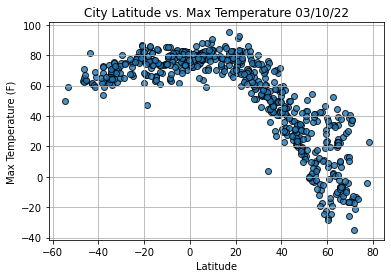

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

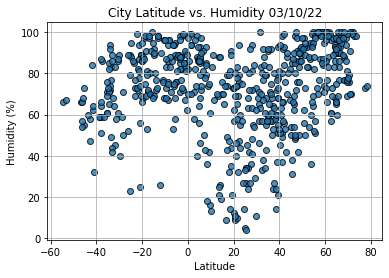

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

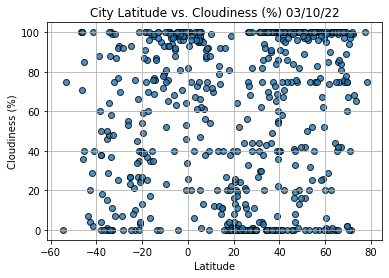

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

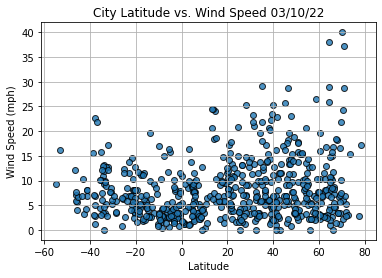

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

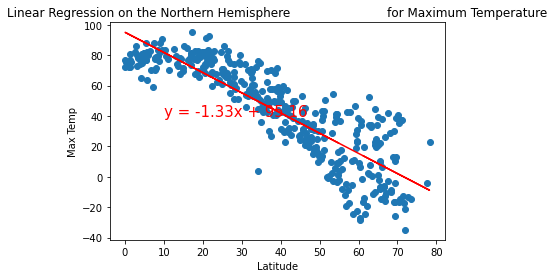

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

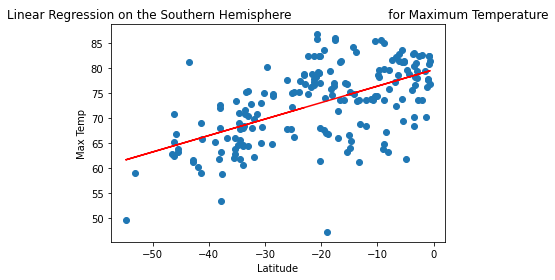

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

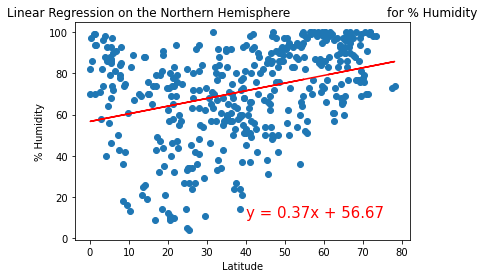

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

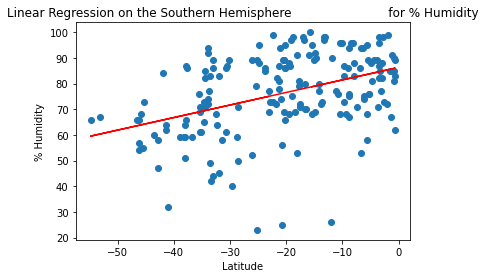

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

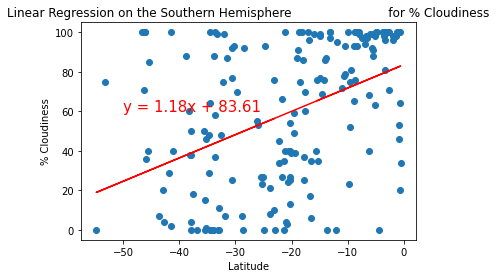

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

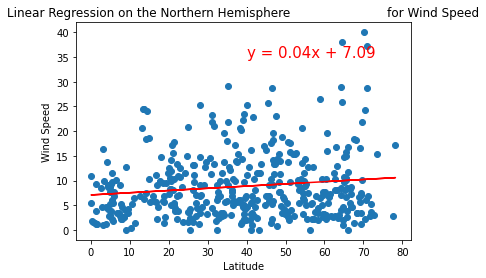

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

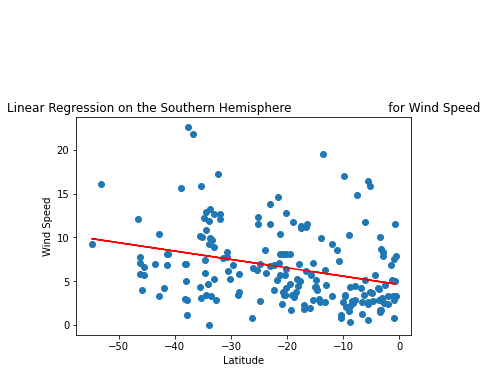

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))